In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#Data Cleaning 

In [4]:
url = r'E:\ML\magic04.data'

In [6]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

In [8]:
df = pd.read_csv(url , names = cols)

In [10]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [20]:
df['class'] = (df['class'] == 'g').astype(int)

In [26]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int32  
dtypes: float64(10), int32(1)
memory usage: 1.5 MB


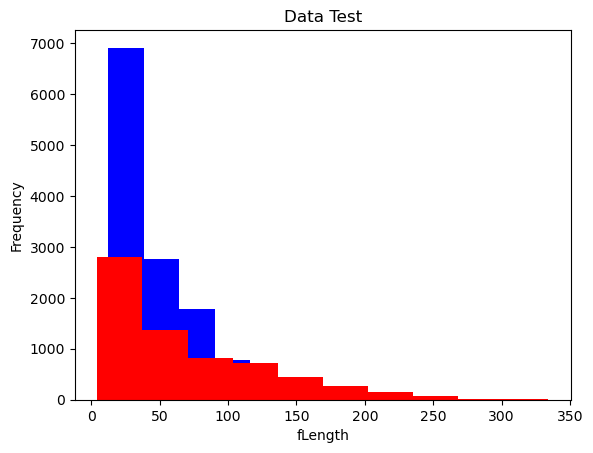

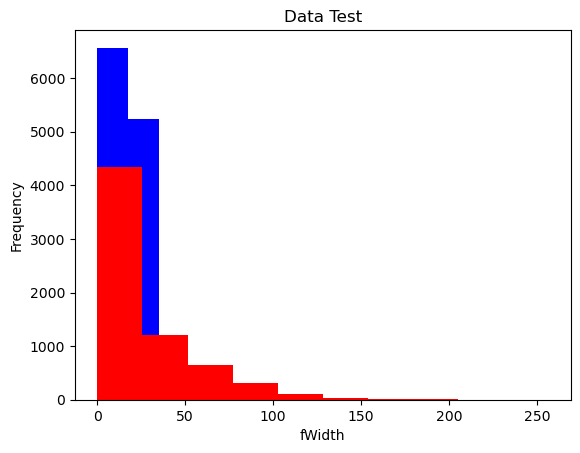

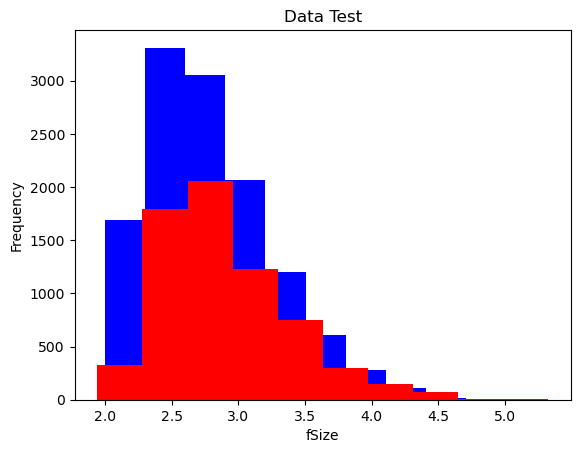

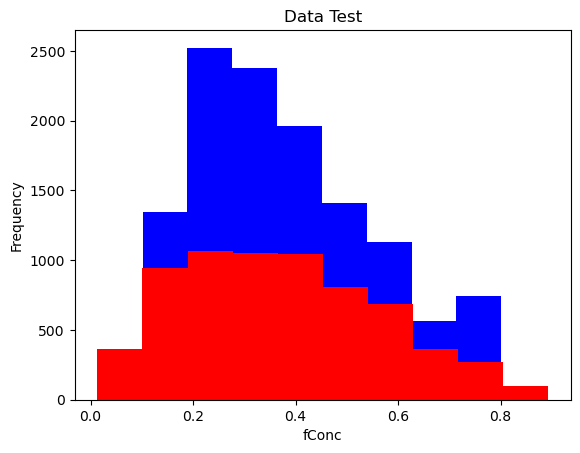

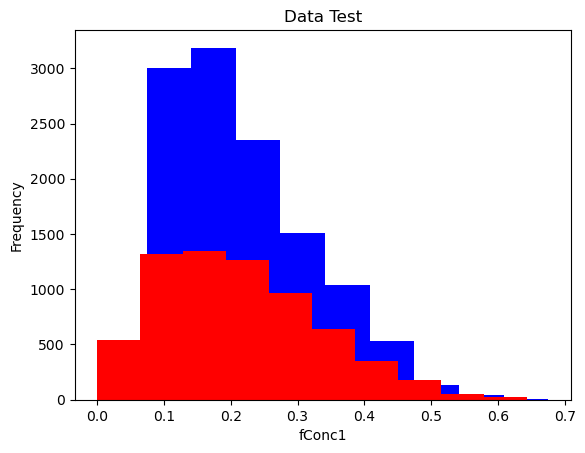

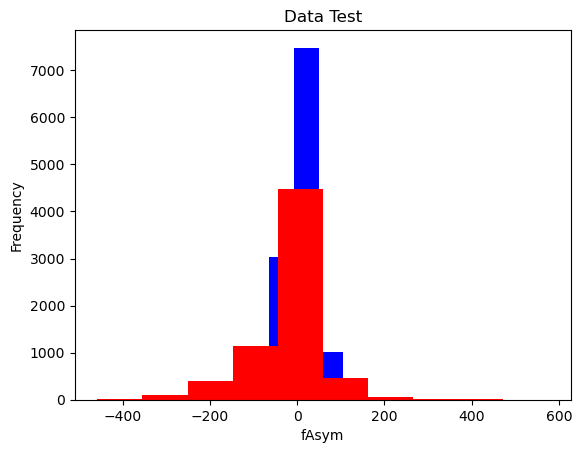

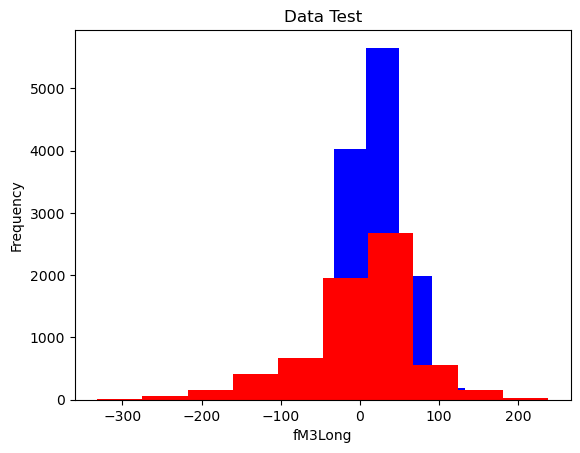

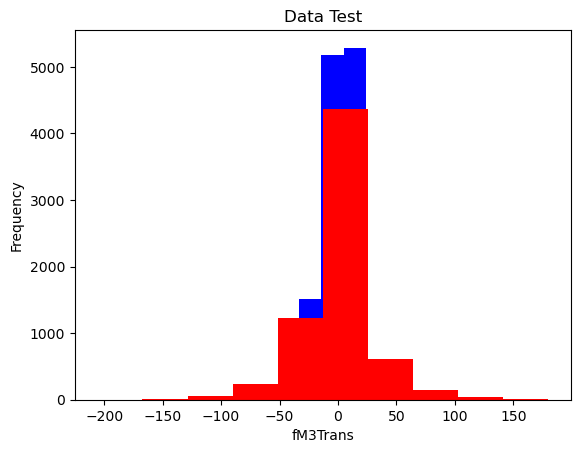

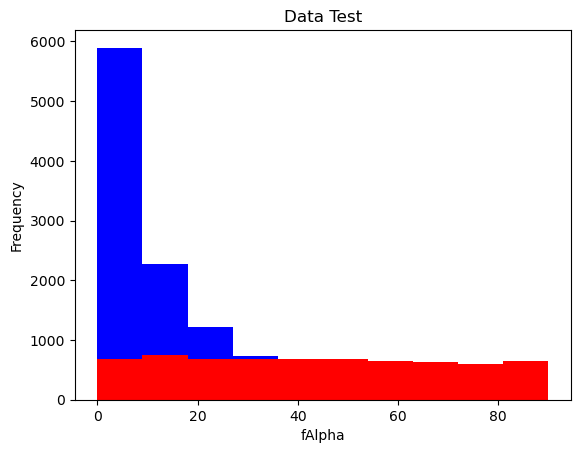

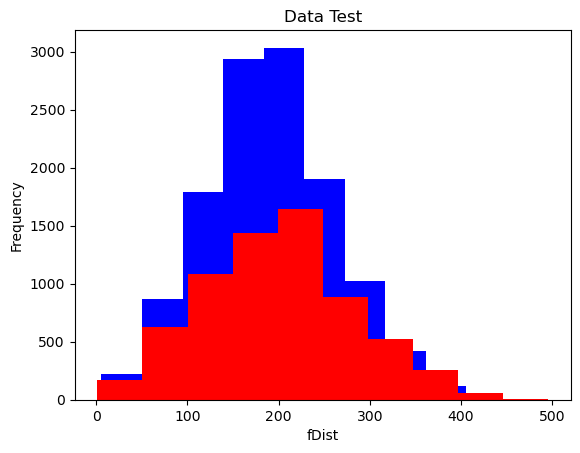

In [30]:
#exploring data
for x in cols[:-1] :
    plt.hist(df[df['class'] ==1][x] , label = 'gamma' , color = 'blue')
    plt.hist(df[df['class'] ==0][x] , label = 'hadron' , color = 'red')
    plt.title('Data Test')
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.show()

In [34]:
#checking null values
df.isnull().sum()


fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [36]:
#Train , validation ,test dataset
train , valid , test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])
print(f"Train: {len(train)}, Valid: {len(valid)}, Test: {len(test)}")

Train: 11412, Valid: 3804, Test: 3804


C:\Users\LapMaster\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [40]:
#testing the label frequency of data
print(len(train[train['class']== 1])) #gamma
print(len(train[train['class']== 0])) #hadron

7422
3990


In [42]:
#using randomOverSampler to minimize the accuracy error do to imbalance labled data
def scale_dataset(dataframe, oversample=False):
    # Extract features (X) and target (y)
    x = dataframe[dataframe.columns[:-1]].values  # Select all columns except the last one
    y = dataframe[dataframe.columns[-1]].values   # Select the last column

    # Standardize features
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    # Apply oversampling if needed
    if oversample:   
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    # Combine back into one dataset
    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y  # Return full dataset, scaled X, and y

In [44]:
#traning the models using the oversample data for training dataset
train , x_train , y_train = scale_dataset(train , oversample = True)
valid , x_valid , y_valid = scale_dataset(valid , oversample = False)
test , x_test , y_test = scale_dataset(test , oversample = False)

In [63]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [65]:
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(x_train , y_train)

KNeighborsClassifier()

In [67]:
y_pred = knn_model.predict(x_test)

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1319
           1       0.86      0.88      0.87      2485

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804

